In [20]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"

In [25]:
def polynomial_function(x):
    polynom_coefs = [72, 7, 6, -7]
    return np.polyval(polynom_coefs[::-1], x)

def objective_function(x):
    return -polynomial_function(x)  

def inverse_bit(value_bin: str, bit_idx: int) -> str:
    return value_bin[:bit_idx] + str(1 - int(value_bin[bit_idx])) + value_bin[bit_idx + 1:]

def genetic_optimization(objective_func, bounds, n_bits=8, population_size=50, generations=1000, mutation_rate=0.25):
    population = np.random.randint(bounds[0], bounds[1], size=(population_size,))
    
    for _ in range(generations):
        # Evaluation: calculate the fitness of each individual
        fitness = objective_func(population)
        
        # Selection: select the best individuals
        sorted_indices = np.argsort(fitness)
        selected_indices = sorted_indices[:population_size // 2]
        selected_population = population[selected_indices]
        
        # Crossover: create offspring by randomly combining pairs of selected individuals
        offsprings_bin = []
        for _ in range(population_size // 2):
            parent1, parent2 = np.random.choice(selected_population, size=2, replace=False)
            parent1_bin, parent2_bin = np.binary_repr(parent1).zfill(n_bits), np.binary_repr(parent2).zfill(n_bits)
            crossover_point = np.random.randint(1, n_bits - 2) 
            child_bin = np.binary_repr(np.clip(int(parent1_bin[:crossover_point] + parent2_bin[crossover_point:], 2), *bounds)).zfill(n_bits)
            offsprings_bin.append(child_bin)
                    
        # Mutation: apply mutation to some individuals
        mutation_mask = np.random.random(size=len(offsprings_bin)) < mutation_rate
        mutated_offsprings_bin = [
            inverse_bit(offspring_bin, np.random.randint(0, n_bits)) if mutation_mask[i] else offspring_bin
            for i, offspring_bin in enumerate(offsprings_bin)
        ]
        
        # Update population with offspring
        population = np.concatenate((selected_population, np.array(list(map(lambda x: int(x, 2), mutated_offsprings_bin)))))
    
    # Select the best individual from the final population
    return population[np.argmax(fitness)]

# Define bounds for the optimization
bounds = (33, 96)  

# Find maximum point
maximum_point = genetic_optimization(objective_function, bounds)
maximum_value = polynomial_function(maximum_point)
print(f"Maximum point: x = {maximum_point}, f(x) = {maximum_value}")

Maximum point: x = 33, f(x) = -244722


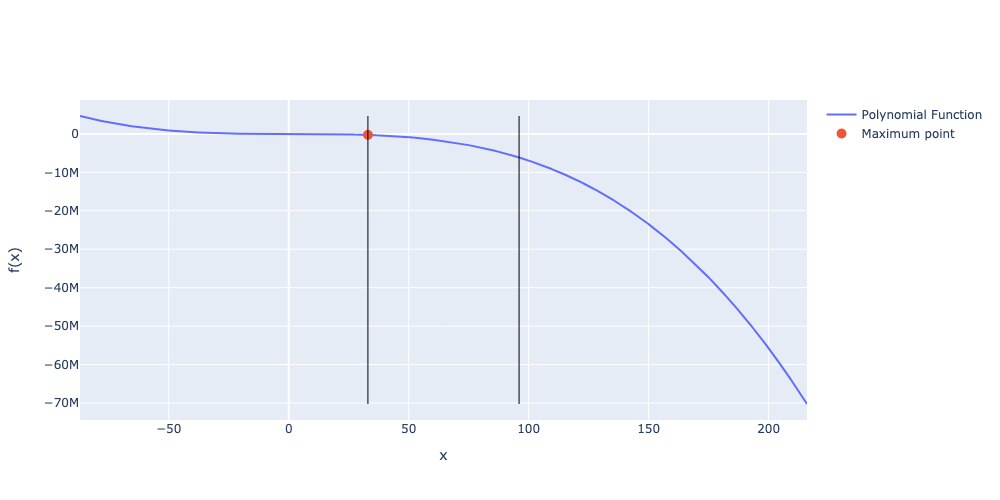

In [26]:
xs = np.linspace(bounds[0] - 120, bounds[1] + 120, 10000)
ys = polynomial_function(xs)

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=xs,
        y=ys,
        mode='lines',
        name='Polynomial Function'
    )
)
fig.add_trace(
    go.Scatter(
        x=[maximum_point],
        y=[maximum_value],
        mode='markers',
        marker=dict(size=10),
        name='Maximum point'
    )

)
for bound in bounds:
    fig.add_shape(
        go.layout.Shape(
            type='line',
            x0=bound,
            x1=bound,
            y0=min(ys),
            y1=max(ys),
            line=dict(
                color='black',
                width=1
            ),
            name='Bounds'
        )
    )
fig.update_layout(
    width=1000,
    xaxis_range=[min(xs), max(xs)],
    xaxis_title='x',
    yaxis_title='f(x)',
)
fig.show()